# The Interview Problem
**Alternate Names**  
The Secretary Problem  
The Fiancee Problem  
The Marriage Problem  
The Dowry Problem  
The Fussy Suitor Problem  
The Googol Game (original name by Martin Gardner)  
The Best Choice Problem (typical mathematical name)  

**Problem**  
You are to interview $n$ candidates for a position.  
After each interview, you must choose to hire or not hire the candidate.  
You may not revisit old candidates.  
Each candidate has a numerical measure of goodness that is disambiguous from all others (no two have the same value).  
The goal is to select the best possible candidate.  

**Algorithm**  
To choose the best candidate, we will interview the first $r$ candidates, then select the next candidate better than the the best of the first $r$.  
Using this algorithm, what is the probability that we choose the best candidate?

In [1]:
from random import shuffle

# this function interviews n candidates and chooses the next candidate better than the first r.
# this function returns the value of the selected candidate (a 'success' is when it returns n)
def interview(n, r):
    candidates = [x for x in range(1, n+1)]
    shuffle(candidates)
    toBeat = max(candidates[:r])
    for cand in candidates[r:]:
        if cand > toBeat:
            return cand
    return candidates[-1]

In [2]:
n = 100
trials = 10000
percentages = []

for r in range(1, n):
    percent_best = sum([interview(n,r) == n for trial in range(trials)]) / trials
    percentages.append((percent_best,r))
best = max(percentages)
best

(0.3781, 36)

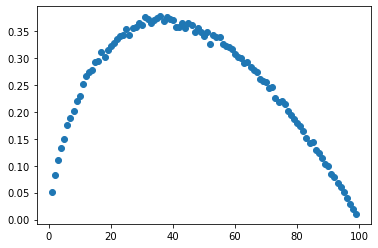

In [3]:
import matplotlib.pyplot as plt

x = [p[1] for p in percentages]
y = [p[0] for p in percentages]

plt.plot(x, y, 'o')
plt.show()

It can be shown that the optimal value of $r$ is the integer nearest to $n/e$

Using this optimal value of $r$, it can be shown that you'll have a probability of $1/e$ of selecting the optimal candidate.

We can see that our experimental results from the variable *best* are close to these theoretical values.

In [4]:
from math import e

# theoretical optimal probability
1/e

0.36787944117144233

In [7]:
# theoretical optimal value of r (number of candidates to view before selecting the next best)
n/e

36.787944117144235

In [8]:
# our experimentally determined optimal probability and r value
best

(0.3781, 36)